<a href="https://colab.research.google.com/github/jcazali/IA/blob/main/modelo_preditivo_arima_serie_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise preditiva de série temporal aplicada aos casos positivos de Covid-19 no Brasil utilizando o Auto ARIMA 

**ARIMA**

* **AR** -> **A**uto**R**egressive -> Autorregressivo (p) -> Número de termos autorregressivos.
* **I** -> **I**ntegrated -> Integrado (d) -> Número de diferenças não sazonais necessárias para a estacionariedade
* **MA** -> **M**moving**A**verage -> Média móvel (q) -> Número de erros de previsão defasados ​​na equação de previsão

Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Carregando os dados em um dataframe 

In [ ]:
dados = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmados = pd.read_csv(dados)
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748


Agrupando por região e eliminando colunas desnecessárias

In [ ]:
confirmados= confirmados.groupby(["Country/Region"]).sum().drop(["Lat", "Long"], axis = 1)
confirmados.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748


Transpondo linhas em colunas

In [ ]:
confirmados = confirmados.transpose()
confirmados.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


Verificando se existem dados ausentes nos registros do Brasil. A função isnull().sum() retorna a soma dos dados ausentes

In [ ]:
confirmados.Brazil.isnull().sum()

0

Criando uma variável com os dados do Brasil

In [ ]:
serie = confirmados.Brazil

Verificando os 5 primeiros registros

In [ ]:
serie.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Brazil, dtype: int64

Verificando os 5 últimos registros

In [ ]:
serie.tail()

6/10/21    17210969
6/11/21    17296118
6/12/21    17374818
6/13/21    17412766
6/14/21    17452612
Name: Brazil, dtype: int64

Criando um gráfico a partir dos dados

[]

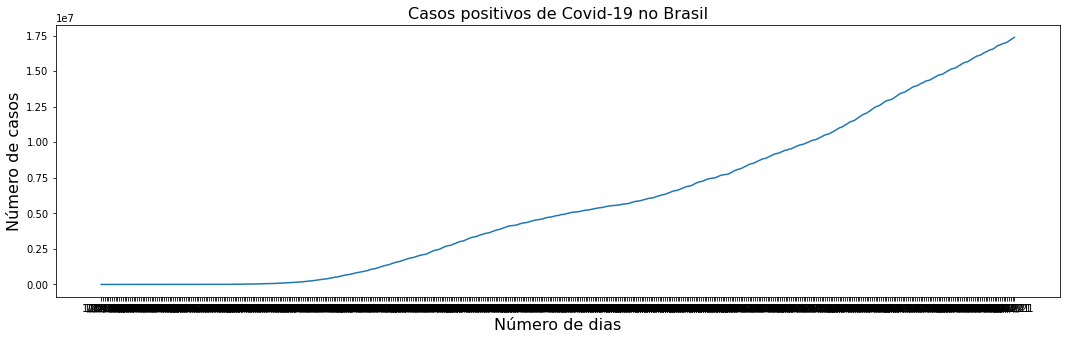

In [ ]:
plt.figure(figsize=(18,5))
fonte = {'size': 16}
plt.title('Casos positivos de Covid-19 no Brasil', fontdict=fonte)
plt.plot(serie)
plt.xlabel('Número de dias', fontdict=fonte)
plt.ylabel('Número de casos', fontdict=fonte)
plt.plot()

Aplicando diferençiação, ou seja, valor do dia atual, menos valor do dia anterior. Com isso podemos observar a sazonalidade da série temporal

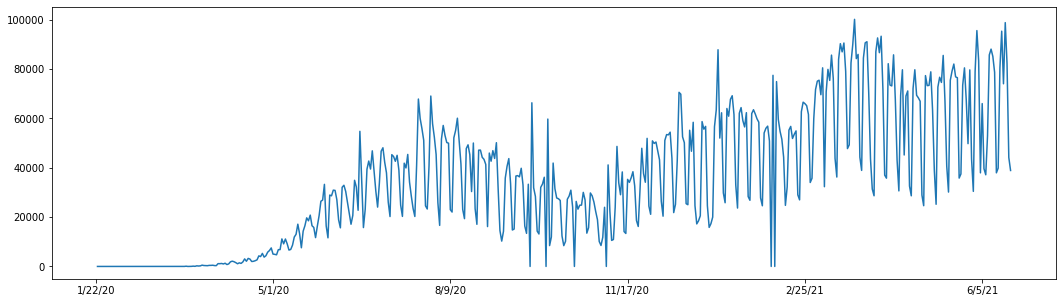

In [ ]:
estacionaria = serie.diff().plot(figsize=(18,5))

Aplicando diferençiação novamente, para tornar a série estacionária. Uma série estacionária tem média constante durante o tempo, não existe tendências de alta ou de baixa

[]

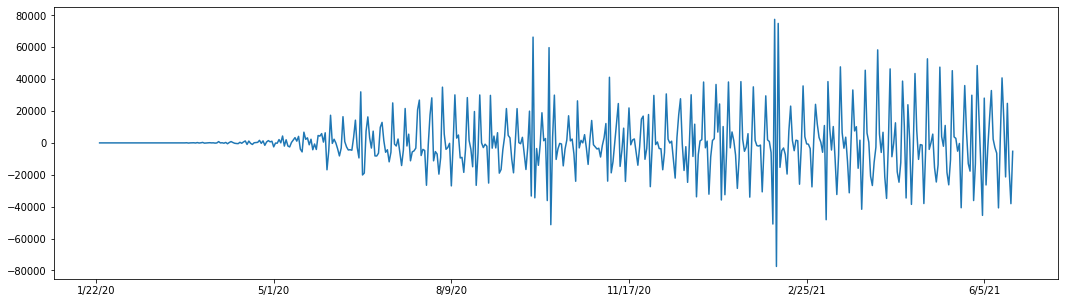

In [ ]:
serie_estacionaria = serie.diff()
serie_estacionaria = serie_estacionaria.diff().plot(figsize=(18,5))
serie_estacionaria.plot()

Analisando a tendência, a sazonalidade e os resíduos

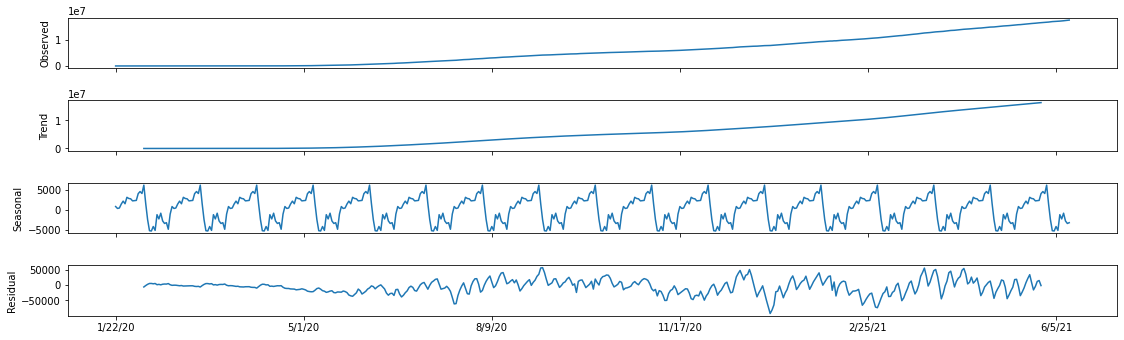

In [ ]:
season = seasonal_decompose(serie, freq=30)
fig = season.plot();
fig.set_size_inches(18,5)

**Auto ARIMA**

Instalando a bilioteca pmdarima

In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.5MB 4.3MB/s 
     |████████████████████████████████| 9.5MB 35.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Importando o Auto ARIMA

In [ ]:
from pmdarima.arima import auto_arima

Verificando a quantidade de dados

In [ ]:
len(serie)

508

Dividindo os dados em base de treino e base de teste

In [ ]:
treino = serie.iloc[:394]
teste = serie.iloc[-114:]

Criando um gráfico com a base de treino e de teste

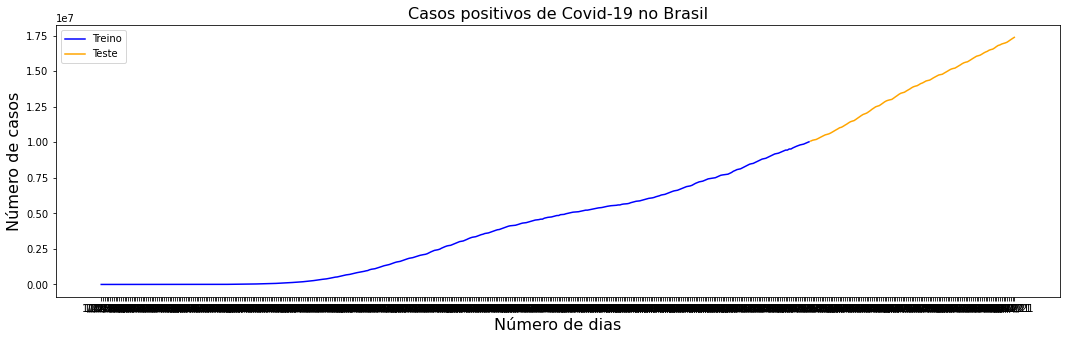

In [ ]:
plt.figure(figsize=(18,5))
plt.title('Casos positivos de Covid-19 no Brasil', fontdict=fonte)
plt.plot(treino, color='b')
plt.plot(teste, color='orange')
plt.legend(['Treino','Teste'])
plt.xlabel('Número de dias', fontdict=fonte)
plt.ylabel('Número de casos', fontdict=fonte)
plt.show()

Treinando o modelo

In [ ]:
modelo = auto_arima(treino, start_p=2, d=None , start_q=2,
	                       max_p=5, max_d=2, max_q=5, start_P=1,
			                   D=None, start_Q=1, max_P=2, max_D=2,
			                   max_Q=2, m=7, seasonal=True,
			                   error_atiction='ignore', trace=True,
			                   supress_warnigs=True, stepwise=True,
			                   random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[7]             : AIC=8297.817, Time=1.75 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=8661.638, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=8463.536, Time=0.50 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=8462.187, Time=0.21 sec
 ARIMA(2,2,2)(0,0,1)[7]             : AIC=8420.198, Time=1.90 sec
 ARIMA(2,2,2)(1,0,0)[7]             : AIC=8361.777, Time=1.09 sec
 ARIMA(2,2,2)(2,0,1)[7]             : AIC=8299.696, Time=3.25 sec
 ARIMA(2,2,2)(1,0,2)[7]             : AIC=8299.685, Time=4.06 sec
 ARIMA(2,2,2)(0,0,0)[7]             : AIC=8482.155, Time=0.46 sec
 ARIMA(2,2,2)(0,0,2)[7]             : AIC=8395.603, Time=3.94 sec
 ARIMA(2,2,2)(2,0,0)[7]             : AIC=8324.387, Time=1.90 sec
 ARIMA(2,2,2)(2,0,2)[7]             : AIC=8300.593, Time=4.11 sec
 ARIMA(1,2,2)(1,0,1)[7]             : AIC=8339.351, Time=0.87 sec
 ARIMA(2,2,1)(1,0,1)[7]             : AIC=8389.904, Time=0.79 sec
 ARIMA(3,2,2)(1,0,1)[7]          

Verificando o modelo

In [ ]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  394
Model:             SARIMAX(5, 2, 2)x(1, 0, 1, 7)   Log Likelihood               -4132.833
Date:                           Mon, 14 Jun 2021   AIC                           8285.665
Time:                                   00:33:49   BIC                           8325.378
Sample:                                        0   HQIC                          8301.404
                                           - 394                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0076      0.201     -0.038      0.970      -0.401       0.386
ar.L2         -0.1817      0.082     -2.222      0.026      -0.342      -0.021
ar.L3         -0.3147      0.083     -3.807      0.000      -0.477      -0.153
ar.L4         -0.3398      0.074     -4.583      0.000      -0.485      -0.194
ar.L5         -0.1899      0.098     -1.944      0.052      -0.381       0.002
ma.L1         -0.9239      0.196     -4.716      0.000      -1.308      -0.540
ma.L2          0.4200      0.159      2.633      0.008       0.107       0.733
ar.S.L7        0.9800      0.022     44.165      0.000       0.936       1.023
ma.S.L7       -0.8488      0.067    -12.628      0.000      -0.981      -0.717
sigma2       9.66e+07   3.46e-09   2.79e+16      0.000    9.66e+07    9.66e+07
===================================================================================
Ljung-Box (Q):                       39.29   Jarque-Bera (JB):              1030.65
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):              27.98   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.19e+31. Standard errors may be unstable.
"""

Realizando a previsão




In [ ]:
previsao = pd.DataFrame(modelo.predict(n_periods=114), index=teste.index)
previsao.columns = ['Casos Previstos']
previsao

,Casos Previstos
2/19/21,1.007933e+07
2/20/21,1.011791e+07
2/21/21,1.015081e+07
2/22/21,1.017599e+07
2/23/21,1.023135e+07
...,...
6/8/21,1.491585e+07
6/9/21,1.496847e+07
6/10/21,1.502100e+07
6/11/21,1.506867e+07


Analisando os dados de treino, de teste e os previstos

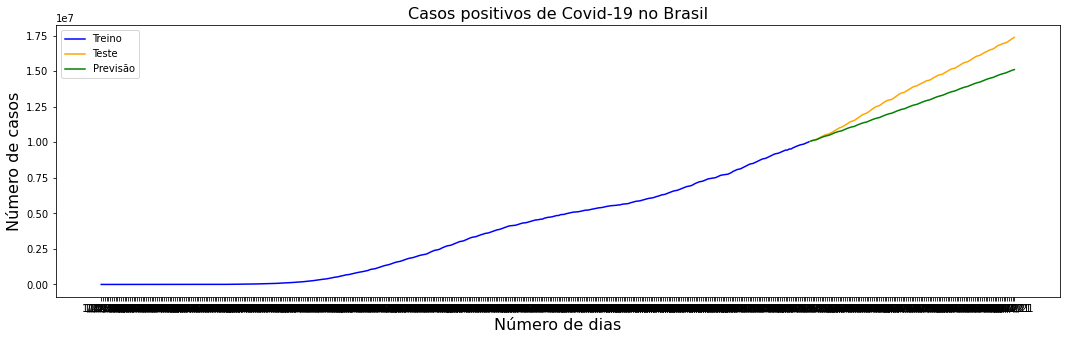

In [ ]:
plt.figure(figsize=(18,5))
plt.title('Casos positivos de Covid-19 no Brasil', fontdict=fonte)
plt.plot(treino, color='b')
plt.plot(teste, color='orange')
plt.plot(previsao, color='green')
plt.legend(['Treino','Teste','Previsão'])
plt.xlabel('Número de dias', fontdict=fonte)
plt.ylabel('Número de casos', fontdict=fonte)
plt.show()